In [141]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

In [142]:
def gaussian(x, mu, sigma):
    r=np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
    return r

def phi(x):                                 # mu=1 sigma=0
    r=1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)  #fonction de densite normale standard
    return r
    
def phi2(x, mu, sigma):                     #distribution normale generalisee DNG
    r=1/sigma*phi((x-mu)/sigma)
    return r

def Phi(x):                                 # fonction integrale de Gauss ou de repartition
        return quad(phi,-np.inf,x)[0]

def F(x):                                   # fonction de distribution d'une DNG
    return Phi((x-mu)/sigma)

In [143]:
mu=0
sigma=1

print(phi(0))        #x
print(phi2(1,1,.5))  #x, mu, sigma  transformation lineraire
print(Phi(0))       # loi normale mu=0 sigma=1print(Phi(0,5,2))
print(F(0))
mu=1000
sigma=2.5
print(F(995),F(1000),F(1005))

0.398942280401
0.797884560803
0.49999999999999994
0.49999999999999994
0.022750131948175985 0.49999999999999994 0.977249868051821


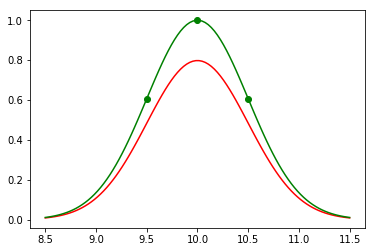

In [144]:
mu = 10
variance = .25
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),'r-')
plt.plot(x,gaussian(x, mu, sigma),'g-')
plt.plot(mu,gaussian(mu, mu, sigma),'go')
plt.plot(mu-sigma,gaussian(mu-sigma, mu, sigma),'go')
plt.plot(mu+sigma,gaussian(mu+sigma, mu, sigma),'go')
plt.show()

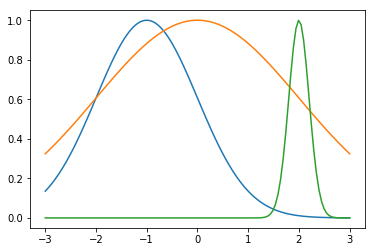

In [145]:
x_values = np.linspace(-3, 3, 120)
for mu, sig in [(-1, 1), (0, 2), (2, .2)]:
    plt.plot(x_values, gaussian(x_values, mu, sig))
plt.show()

In [146]:
from scipy.integrate import quad

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))  #integrale avec params
print(I)

(1.6666666666666667, 1.8503717077085944e-14)


(0.3333333333333333, 3.700743415417188e-15)


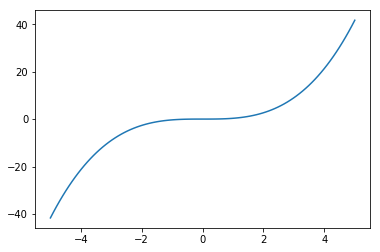

In [147]:
def f(x):
    return x**2

I = quad(f, 0, 1)  #integrale f(x) de 0 a 1
print(I)           #quad renvoie une liste:(result,erreur)

x=np.linspace(-5,5,100)
y=[]
#print(x)
#y=quad(f,0,i in x)[0]
#y.append(quad(f,0,x)[0])

for i in x:
    q=quad(f,0,i)
    y.append(q[0])

plt.plot(x,y)
plt.show()

In [148]:
I = quad(phi, -np.inf, 1)
print(I)

(0.8413447460685435, 2.7838978091934524e-09)


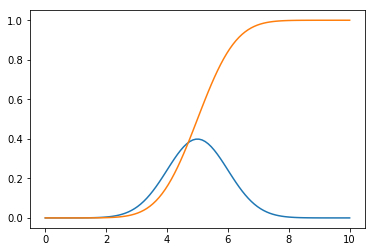

In [149]:
mu=5
x=np.linspace(mu-5,mu+5,100)
y=[]
for i in x:
    q=quad(phi,-np.inf,i-mu)
    y.append(q[0])
plt.plot(x,phi(x-mu))
plt.plot(x,y)
plt.show()

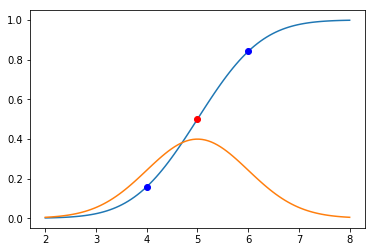

In [150]:
mu=5
sigma=1

x=np.linspace(mu-3*sigma,mu+3*sigma,100)
y=[]
for i in x:
    q=quad(phi2,0,i,args=(mu,sigma))
    y.append(q[0])
plt.plot(x,y)
plt.plot(x,phi2(x,mu,sigma))
plt.plot(mu,quad(phi2,-np.inf,mu,args=(mu,sigma))[0],'ro')
plt.plot(mu-sigma,quad(phi2,-np.inf,mu-sigma,args=(mu,sigma))[0],'bo')
plt.plot(mu+sigma,quad(phi2,-np.inf,mu+sigma,args=(mu,sigma))[0],'bo')
plt.show()

In [151]:
p=5
phi2(p,mu,sigma)

0.3989422804014327

In [152]:
quad(phi2,-np.inf,p,args=(mu,sigma))

(0.4999999999999999, 5.089095724003252e-09)

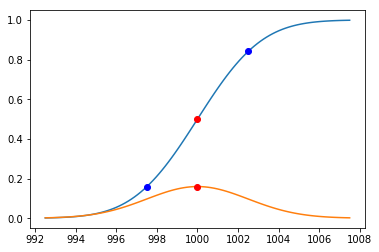

In [153]:
mu=1000
sigma=2.5

x=np.linspace(mu-3*sigma,mu+3*sigma,100)
y=[]
for i in x:
    q=quad(phi2,0,i,args=(mu,sigma))
    y.append(q[0])
plt.plot(x,y)
plt.plot(x,phi2(x,mu,sigma))
plt.plot(mu,phi2(mu,mu,sigma),'ro')
plt.plot(mu,quad(phi2,-np.inf,mu,args=(mu,sigma))[0],'ro')
plt.plot(mu-sigma,quad(phi2,-np.inf,mu-sigma,args=(mu,sigma))[0],'bo')
plt.plot(mu+sigma,quad(phi2,-np.inf,mu+sigma,args=(mu,sigma))[0],'bo')
plt.show()

In [154]:
max=1005
min=995
PhiMax=quad(phi2,-np.inf,max,args=(mu,sigma))[0]
PhiMin=quad(phi2,-np.inf,min,args=(mu,sigma))[0]
print(PhiMax,PhiMin,1-PhiMax)
print('{:2.2f}%'.format((2*PhiMax-1)*100))

0.9772498680518193 0.02275013194817878 0.022750131948180652
95.45%


In [155]:
PhiMax=quad(phi2,-np.inf,mu+sigma,args=(mu,sigma))[0]
PhiMin=quad(phi2,-np.inf,mu-sigma,args=(mu,sigma))[0]
print(PhiMax-PhiMin)
print('{:2.2f}%'.format((2*PhiMax-1)*100))

0.6826894921370843
68.27%


In [156]:
PhiMax=quad(phi2,-np.inf,mu+3*sigma,args=(mu,sigma))[0]
PhiMin=quad(phi2,-np.inf,mu-3*sigma,args=(mu,sigma))[0]
print(PhiMax-PhiMin)
print('{:2.2f}%'.format((2*PhiMax-1)*100))

0.9973002039367409
99.73%


In [157]:
'''
def Phi(x, mu=0,sigma=1):     # integrale de Gauss
    return quad(phi,-np.inf,x)[0]

def F(x):
    return Phi((x-mu)/sigma, mu,sigma)
'''
mu=1000
sigma=2.5
print(Phi(1))
print(F(mu))
print(F(mu-sigma),F(mu+sigma))
print(1-F(mu-sigma))

print(F(1005)-F(995))

0.8413447460685435
0.49999999999999994
0.15865525393145705 0.8413447460685435
0.8413447460685429
0.954499736103645


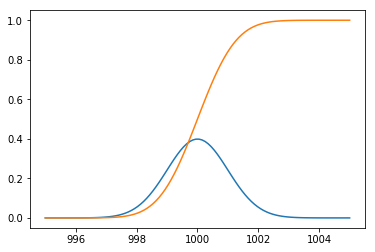

In [158]:
x=np.linspace(mu-5,mu+5,100)
y=[]
for i in x:
    #q=quad(phi,-np.inf,i-mu)[0]
    q=Phi(i-mu)
    y.append(q)
plt.plot(x,phi(x-mu))
plt.plot(x,y)
plt.show()